https://www.kaggle.com/mlg-ulb/creditcardfraud

In [ ]:
# Bibliotecas utilizadas
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('creditcard.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35742 entries, 0 to 35741
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    35742 non-null  int64  
 1   V1      35742 non-null  float64
 2   V2      35742 non-null  float64
 3   V3      35742 non-null  float64
 4   V4      35742 non-null  float64
 5   V5      35742 non-null  float64
 6   V6      35741 non-null  float64
 7   V7      35741 non-null  float64
 8   V8      35741 non-null  float64
 9   V9      35741 non-null  float64
 10  V10     35741 non-null  float64
 11  V11     35741 non-null  float64
 12  V12     35741 non-null  float64
 13  V13     35741 non-null  float64
 14  V14     35741 non-null  float64
 15  V15     35741 non-null  float64
 16  V16     35741 non-null  float64
 17  V17     35741 non-null  float64
 18  V18     35741 non-null  float64
 19  V19     35741 non-null  float64
 20  V20     35741 non-null  float64
 21  V21     35741 non-null  float64
 22

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
df.dropna(inplace=True) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


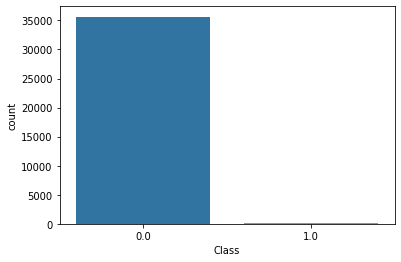

In [ ]:
df['Class'].value_counts()
sns.countplot(df['Class'])

In [ ]:
df.corr()['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.238658
V4        0.218077
V2        0.201216
V8        0.165971
V27       0.112348
V20       0.048432
V21       0.046050
V19       0.033920
V25       0.020235
V28       0.017560
V26       0.016830
V13       0.005505
Amount    0.001483
V15      -0.006287
Time     -0.015140
V22      -0.020230
V24      -0.021945
V23      -0.031608
V6       -0.098514
V9       -0.139867
V18      -0.174032
V5       -0.202736
V1       -0.221109
V16      -0.285014
V12      -0.298209
V10      -0.312752
V7       -0.325966
V14      -0.397224
V3       -0.407347
V17      -0.413018
Name: Class, dtype: float64

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000
mean,23996.902297,-0.208426,0.072574,0.718282,0.195747,-0.216692,0.095575,-0.116847,0.032755,0.259459,-0.086799,0.456345,-0.539436,0.295139,0.269070,0.082563,-0.000769,0.165609,-0.087438,-0.036866,0.044814,-0.030876,-0.113555,-0.041571,0.007469,0.135958,0.021813,0.010836,0.003834,84.203356,0.002882
std,12423.599433,1.836762,1.540586,1.540916,1.409080,1.388765,1.310633,1.257788,1.242285,1.238161,1.136948,1.136513,1.417893,1.159993,1.167172,0.958039,0.933419,1.070780,0.858317,0.815874,0.674353,0.769829,0.640398,0.545241,0.593343,0.435886,0.506559,0.388306,0.302016,227.279858,0.053606
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,-14.166795,-2.985309,-17.769143,-3.808724,-19.214325,-4.152532,-12.227189,-18.587366,-8.061208,-4.932733,-13.694584,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.438650,-8.567638,-9.617915,0.000000,0.000000
25%,12283.000000,-0.960227,-0.499337,0.244735,-0.714486,-0.818210,-0.644998,-0.598057,-0.155602,-0.523422,-0.566021,-0.362238,-1.532538,-0.492169,-0.245798,-0.479044,-0.490066,-0.331509,-0.563184,-0.527465,-0.161657,-0.239644,-0.536461,-0.178485,-0.326932,-0.127310,-0.331727,-0.063200,-0.007248,6.990000,0.000000
50%,28990.000000,-0.234549,0.113970,0.827531,0.188768,-0.255049,-0.163054,-0.073069,0.043456,0.135169,-0.142211,0.429242,-0.171042,0.218198,0.221229,0.205061,0.063777,0.108561,-0.069125,-0.035266,-0.022256,-0.081611,-0.087516,-0.051996,0.061818,0.175722,-0.063275,0.008848,0.021087,22.000000,0.000000
75%,34258.000000,1.162263,0.755027,1.456378,1.078566,0.302996,0.485169,0.436560,0.307599,0.991696,0.357903,1.236400,0.461248,1.059571,0.914117,0.762741,0.560463,0.602107,0.409049,0.472234,0.166413,0.094995,0.296665,0.076214,0.398791,0.421085,0.301153,0.086772,0.076006,76.000000,0.000000
max,38241.000000,1.960497,16.713389,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,12.701539,12.018913,4.846452,4.465413,7.692209,3.832930,6.098529,9.253526,4.295648,4.555359,17.281859,22.614889,5.805795,13.876221,4.014444,5.525093,3.517346,11.135740,5.678671,7879.420000,1.000000


In [ ]:
X = df.drop(['Class'], axis=1)
y = df['Class']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=7)

In [ ]:
model = RandomForestClassifier()

#from xgboost import XGBClassifier
#model = XGBClassifier()

In [ ]:
model = model.fit(X_train, y_train)

In [ ]:
model = model.fit(X_train, y_train)

y_predict = model.predict(X_val)

In [ ]:
gabarito = pd.DataFrame({'Gabarito': y_val,'Previsoes_da_Máquina': y_predict})
gabarito

,Gabarito,Previsoes_da_Máquina
480,0.0,0.0
28230,0.0,0.0
35393,0.0,0.0
21986,0.0,0.0
35676,0.0,0.0
...,...,...
26538,0.0,0.0
20549,0.0,0.0
11561,0.0,0.0
10631,0.0,0.0


In [ ]:
print('Classification metrics: \n', classification_report(y_val, y_predict))

Classification metrics: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10699
         1.0       0.91      0.88      0.89        24

    accuracy                           1.00     10723
   macro avg       0.96      0.94      0.95     10723
weighted avg       1.00      1.00      1.00     10723

